In [2]:
import pandas as pd

In [18]:
df = pd.read_csv("전처리_기온.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고번호        1543 non-null   object 
 1   사고일시        1543 non-null   object 
 2   요일          1543 non-null   object 
 3   시군구         1543 non-null   object 
 4   사고내용        1543 non-null   object 
 5   사망자수        1543 non-null   int64  
 6   중상자수        1543 non-null   int64  
 7   경상자수        1543 non-null   int64  
 8   부상신고자수      1543 non-null   int64  
 9   사고유형        1543 non-null   object 
 10  법규위반        1543 non-null   object 
 11  노면상태        1543 non-null   object 
 12  기상상태        1543 non-null   object 
 13  도로형태        1543 non-null   object 
 14  가해운전자 차종    1543 non-null   object 
 15  가해운전자 성별    1543 non-null   object 
 16  가해운전자 연령    1543 non-null   object 
 17  가해운전자 상해정도  1543 non-null   object 
 18  피해운전자 차종    1543 non-null   object 
 19  피해운전자 성별    1543 non-null  

In [1]:
df_상해_연령 = pd.read_csv("상해정도_나이.csv")

연령 = ["1~10", "11~20", "21~30", "31~40", "41~50", "51~60", "61~70", "71~80", "80이상"]


연령_10 = df_상해_연령[df_상해_연령['나이']<=10]
연령_10['나이'] = 0
연령_20 = df_상해_연령[(df_상해_연령['나이']<=20) & (df_상해_연령['나이']>=11)]
연령_20['나이'] = 10
연령_30 = df_상해_연령[(df_상해_연령['나이']<=30) & (df_상해_연령['나이']>=21)]
연령_30['나이'] = 20
연령_40 = df_상해_연령[(df_상해_연령['나이']<=40) & (df_상해_연령['나이']>=31)]
연령_40['나이'] = 30
연령_50 = df_상해_연령[(df_상해_연령['나이']<=50) & (df_상해_연령['나이']>=41)]
연령_50['나이'] = 40
연령_60 = df_상해_연령[(df_상해_연령['나이']<=60) & (df_상해_연령['나이']>=51)]
연령_60['나이'] = 50
연령_70 = df_상해_연령[(df_상해_연령['나이']<=70) & (df_상해_연령['나이']>=61)]
연령_70['나이'] = 60
연령_80 = df_상해_연령[(df_상해_연령['나이']<=80) & (df_상해_연령['나이']>=71)]
연령_80['나이'] = 70
연령_90 = df_상해_연령[df_상해_연령['나이']>=81]
연령_90['나이'] = 80
연령_10

NameError: name 'pd' is not defined

In [64]:
연령_나이대별 = [연령_10, 연령_20, 연령_30, 연령_40, 연령_50, 연령_60, 연령_70, 연령_80, 연령_90]

In [65]:
연령대_result = pd.concat([연령_10, 연령_20, 연령_30, 연령_40, 연령_50, 연령_60, 연령_70, 연령_80, 연령_90], ignore_index=True)

In [66]:
연령_상해1 = 연령대_result[연령대_result['상해정도']==1]
연령_상해2 = 연령대_result[연령대_result['상해정도']==2]
연령_상해3 = 연령대_result[연령대_result['상해정도']==3]
연령_상해4 = 연령대_result[연령대_result['상해정도']==4]

In [23]:
for i in range(len(df_상해_연령)):
    if df['피해운전자 상해정도'][i] == "부상신고":
        df['피해운전자 상해정도'][i] = 1
    elif df['피해운전자 상해정도'][i] == "경상":
        df['피해운전자 상해정도'][i] = 2
    elif df['피해운전자 상해정도'][i] == "중상":
        df['피해운전자 상해정도'][i] = 3
    elif df['피해운전자 상해정도'][i] == "사망":
        df['피해운전자 상해정도'][i] = 4

<ipython-input-23-e473fcd6cafd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['피해운전자 상해정도'][i] = 3
<ipython-input-23-e473fcd6cafd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['피해운전자 상해정도'][i] = 2
<ipython-input-23-e473fcd6cafd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['피해운전자 상해정도'][i] = 4
<ipython-input-23-e473fcd6cafd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

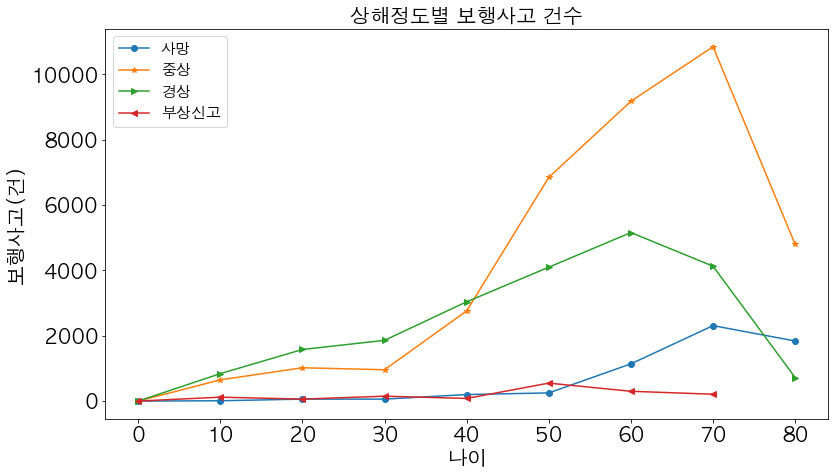

In [84]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,7))
plt.rcParams['axes.unicode_minus'] = False
연령_상해4.groupby("나이")['나이'].sum().plot(marker='o', label='사망')
연령_상해3.groupby("나이")['나이'].sum().plot(marker='*', label='중상')
연령_상해2.groupby("나이")['나이'].sum().plot(marker='>', label='경상')
연령_상해1.groupby("나이")['나이'].sum().plot(marker='<', label='부상신고')
#plt.rc('font', size=20)

plt.title("상해정도별 보행사고 건수", fontsize=20)
plt.ylabel("보행사고(건)")
plt.legend(fontsize= 15)
plt.tight_layout()
plt.savefig("나이별 사고건수(상해중심).jpeg")